# Solving Linear Programming using cvxpy

Here, we use the library, **cvxpy** to find the solution of the linear programming problem (LPP).

To install this library, use the following command:

In [6]:
!pip install cvxpy


In [7]:
import cvxpy as cp
import numpy as np

## EXAMPLE 1

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq x_1,\ x_2 \leq 2\end{matrix}$$

The expected solution is $z=3.5$ where $x_1=1.5,\ x_2=2$.

## CODE

# Step 1: First define the number of variables that would be used

For example, if only two $x_is$ would be used,

This line creates a column matrix of dimensions $2\times 1$ (in a general case, if $n$ is the number of linear programming variables, then a column matrix of dimensions $n \times 1$ should be made.)

In [8]:
# cp.Variable là hàm dùng để tạo ra một biến tối ưu hóa trong CVXPY. 
# Biến này là đối tượng mà bạn sẽ tối ưu hóa trong các bài toán tối ưu hóa.
x = cp.Variable(shape=(2,1), name="x")

In [9]:
x

Variable((2, 1), x)

# Step 2: Define the constraints

Here the constraints are as follows
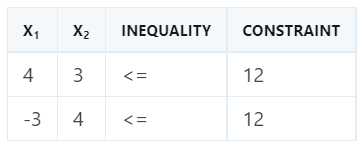

All values of x lie between 0 and 2 both inclusive.

In [10]:
A = np.array([[4,3],[-3,4]])
constraints = [cp.matmul(A, x) <= 12, x<=2, x>=0]
# cp.matmul(A, x) thực hiện phép nhân ma trận giữa ma trận A và biến x.

The above lines first make a $2 \times 2$ matrix (as described in the table above). Since both of their constraints are the same, we can define the constraint in a single line, by making the matrix $<= 12$.

Multiple constraints on both the variables can be defined using $x$ as a general variable.

For defining multiple single lined distinct constraints, use the following format:
$$A x <= B$$

Where $<=$ can be replaced by any other inequality symbol.

Here A is a square matrix of dimensions $n \times n$ where n is the number of varibles in the linear programming problem, x is as defined in the previous step, and B is a column matrix of dimensions $n \times 1$.

For example, for defining the following constraints, use the following snippet: ($n = 3$)




# Step 3: Define the objective function

Here the objective function is $z = x_1 + x_2$.

In [11]:
# xác định hàm mục tiêu là tổng các phần tử của biến x dọc theo trục 0 và tối đa hóa giá trị này.
objective = cp.Maximize(cp.sum(x, axis=0))
# cp.Maximize là một hàm trong CVXPY được sử dụng để định nghĩa hàm mục tiêu cho bài toán tối ưu hóa. 
# Hàm mục tiêu này sẽ được tối đa hóa trong quá trình giải bài toán.Bất cứ điều gì nằm trong dấu ngoặc (...) sẽ là hàm mục tiêu tối đa hóa.

# cp.sum(x): Đây là hàm tính tổng tất cả các phần tử của x. Nếu x là một vector hoặc ma trận, cp.sum(x) sẽ trả về tổng của tất cả các phần tử trong x.
# axis=0: Tính tổng dọc theo trục 0, tức là tính tổng các phần tử trên mỗi cột nếu x là ma trận.

For an objective function $z = 3x_1 + 4x_2$, define a new 1 dimensional array containing the different parameters in the objective function as follows:

In [12]:
r = np.array([3,4])
objective = cp.Maximize(cp.matmul(r, x))

# Step 4: Define the problem and then solve it

The problem is defined by the objective function and the constraints.

In [13]:
problem = cp.Problem(objective, constraints)
solution = problem.solve()


# Step 5: Print the maximised objective funstion, and the x values

Here, solution contains the value of the objective function, and x.value is the column matrix, containing the values of $x_i$.

In [14]:
print(solution)
print(x.value)


12.499999998792216
[[1.5]
 [2. ]]


Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq x_1,\ x_2 \leq 2\end{matrix}$$

# Final code

In [15]:
import cvxpy as cp
import numpy as np

x = cp.Variable(shape=(2,1), name="x") # Khởi tạo biến
A = np.array([[4,3],[-3,4]]) # Khởi tạo tham số

constraints = [cp.matmul(A, x) <= 12, cp.matmul(A, x) <= 12, x<=2, x>=0] # define constrain
objective = cp.Maximize(cp.sum(x, axis=0)) 
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value)


3.4999999958801036
[[1.50000001]
 [1.99999998]]


In [16]:
x1 = x.value[0]
x2 = x.value[1]
tong = x1+x2
print(tong)

[3.5]


Here the first line denotes the solution while the next two lines denote the values of the two parameters.



# EXAMPLE 2

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=4x_1+2x_2 \\ 
\text{subject to} & 4x_1+3x_2 \leq 12 \\
& -3x_1 + 6x_2 \leq 10 \\
& x_1 \geq 1\\
& 0\leq x_1,\ \ x_2 \leq 5\end{matrix}$$

The expected solution is $z=4.0$ where $x_1=1,\ x_2=0$.

In [54]:
x1 = cp.Variable()
x2 = cp.Variable()

objective = cp.Minimize(4*x1 + 2*x2)
constraints = [
    4*x1 + 3*x2 <= 12,
    -3*x1 + 6*x2 <= 10,
    x1 >= 1,
    0 <= x1, x1 <= 5,
    0 <= x2, x2 <= 5
]

problem = cp.Problem(objective, constraints)
results = problem.solve()

print(f"z = {results.round()}")
print(f"x1 = {x1.value.round()}")
print(f"x2 = {x2.value.round()}")

z = 4.0
x1 = 1.0
x2 = 0.0


In [40]:
x1 = cp.Variable()
x2 = cp.Variable()

# Hàm mục tiêu: minimize(4*x1 + 2*x2)
objective = cp.Minimize(4*x1 + 2*x2)

# Các ràng buộc
constraints = [
    4*x1 + 3*x2 <= 12,
    -3*x1 + 6*x2 <= 10,
    x1 >= 1,
    0 <= x1, x1 <= 5,
    0 <= x2, x2 <= 5
]

# Xây dựng bài toán tối ưu
problem = cp.Problem(objective, constraints)

# Giải bài toán
result = problem.solve()

# In kết quả
print(f"Giá trị tối ưu của x1: {x1.value.round()}")
print(f"Giá trị tối ưu của x2: {x2.value.round()}")
print(f"Giá trị tối ưu của z = 4x1 + 2x2: {result.round()}")


Giá trị tối ưu của x1: 1.0
Giá trị tối ưu của x2: 0.0
Giá trị tối ưu của z = 4x1 + 2x2: 4.0


# EXAMPLE 3


Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=x+2y \\ 
\text{subject to} & 2x+y \leq 20 \\
& 4x - 5y \geq -10 \\
& -x+2y \geq -2\\
& x,\ y \geq 0\end{matrix}$$

In [61]:
x = cp.Variable()
y = cp.Variable()

objective = cp.Minimize(x + 2*y)
constraints = [
    2*x + y <= 20,
    4*x - 5*y >= -10,
    -x + 2*y >= -2,
    x >= 0,
    y >= 0
]

problem = cp.Problem(objective, constraints)
results = problem.solve()

print(f"z = {results}")
print(f"x1 = {x1.value}")
print(f"x2 = {x2.value}")

z = 3.702581866853527e-11
x1 = 0.9999999999761703
x2 = 1.9858645300377776e-11


In [63]:
# TO DO
x = cp.Variable(shape=(2,1), name="x")

A = np.array([[2,1],
              [4,-5], 
              [-1,2]])
B = np.array([[20] ,[-10], [-2]])

constraints = [cp.matmul(A[0], x) <= B[0],
               cp.matmul(A[1], x) >= B[1],
               cp.matmul(A[2], x) >= B[2], x >= 0]
r = np.array([1, 2])
objective = cp.Minimize(cp.matmul(r, x))
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value)


3.702581866853527e-11
[[2.64263088e-11]
 [5.29975493e-12]]


# Example 4

Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=40x+90y \\ 
\text{subject to} & 9x+7y \leq 56 \\
& 7x + 20y \geq 70 \\
& x,\ y \geq 0\end{matrix}$$

In [24]:
# TO DO
x = cp.Variable(shape=(2,1), name="x")

A = np.array([[2,1],
              [4,-5], 
              [-1,2]])
B = np.array([[20] ,[-10], [-2]])

constraints = [cp.matmul(A[0], x) <= B[0],
               cp.matmul(A[1], x) >= B[1],
               cp.matmul(A[2], x) >= B[2], x >= 0]

objective = cp.Maximize(cp.sum(x, axis=0))
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value)


13.5714285645659
[[6.42857143]
 [7.14285714]]


# Exercise:
Using cvxpy to solve **Example 2, 3, and 4**.